I will be using Simple Linear Regression to Predict the tv marketing dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open("tvmarketing.csv") as f:
    file = pd.read_csv(f)
print(file)

        TV  Sales
0    230.1   22.1
1     44.5   10.4
2     17.2    9.3
3    151.5   18.5
4    180.8   12.9
..     ...    ...
195   38.2    7.6
196   94.2    9.7
197  177.0   12.8
198  283.6   25.5
199  232.1   13.4

[200 rows x 2 columns]


150    16.1
151    11.6
152    16.6
153    19.0
154    15.6
155     3.2
156    15.3
157    10.1
158     7.3
159    12.9
160    14.4
161    13.3
162    14.9
163    18.0
164    11.9
165    11.9
166     8.0
167    12.2
168    17.1
169    15.0
170     8.4
171    14.5
172     7.6
173    11.7
174    11.5
175    27.0
176    20.2
177    11.7
178    11.8
179    12.6
180    10.5
181    12.2
182     8.7
183    26.2
184    17.6
185    22.6
186    10.3
187    17.3
188    15.9
189     6.7
190    10.8
191     9.9
192     5.9
193    19.6
194    17.3
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, dtype: float64


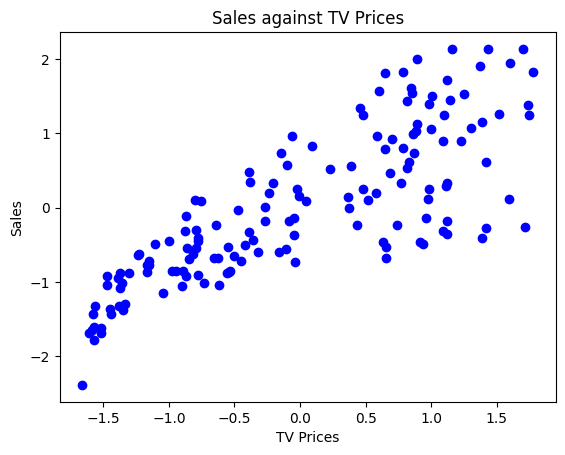

In [32]:
x_train, x_test = file["TV"][:150], file["TV"][150:]
x_mean, x_std = x_train.mean(), x_train.std()
x_train =  (x_train - x_mean) / x_std
x_train = np.array(x_train)

y_train, y_test = file["Sales"][:150], file["Sales"][150:]
y_mean, y_std = y_train.mean(), y_train.std()
y_train =  (y_train - y_mean) / y_std
y_train = np.array(y_train)

plt.scatter(x_train, y_train,marker='o',c='b')
plt.title("Sales against TV Prices")
plt.ylabel("Sales")
plt.xlabel("TV Prices")
plt.show()

In [27]:
f = lambda w,x,b: w * x + b

def compute_gradient(x,y,w,b):
    m = x.shape[0]

    dj_dw = 0.
    dj_db = 0.

    for i in range(m):
        dj_dw_i = (f(w,x[i],b) - y[i])
        dj_db += (f(w,x[i],b) - y[i])
        dj_dw += dj_dw_i * x[i]

    return dj_dw / m, dj_db / m

In [28]:
def gradient_descent(x,y,w,b,nums_iter,learning_rate):

    m = x.shape[0]

    for i in range(nums_iter):
        dj_dw, dj_db = compute_gradient(x,y,w,b)
        b -= learning_rate * dj_db
        w -= learning_rate * dj_dw

    return w,b

In [29]:
w_ = 0.
b_ = 0.
nums_iter = 10000
learning_rate = 0.0006

w,b = gradient_descent(x_train,y_train,w_,b_,nums_iter,learning_rate)

print(w,b)

0.8006489464842408 -3.330657971645225e-16


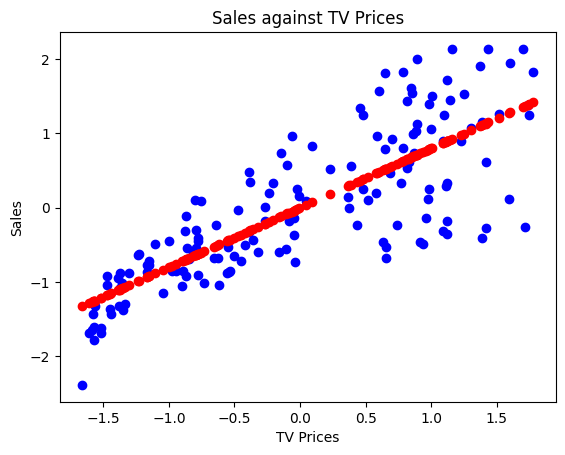

In [14]:
predictions = np.zeros(x_train.shape[0])

for i in range(x_train.shape[0]):
    predictions[i] = f(w,x_train[i],b)

plt.scatter(x_train, y_train,marker='o',c='b')
plt.scatter(x_train, predictions,marker='o',c='r')
plt.title("Sales against TV Prices")
plt.ylabel("Sales")
plt.xlabel("TV Prices")
plt.show()

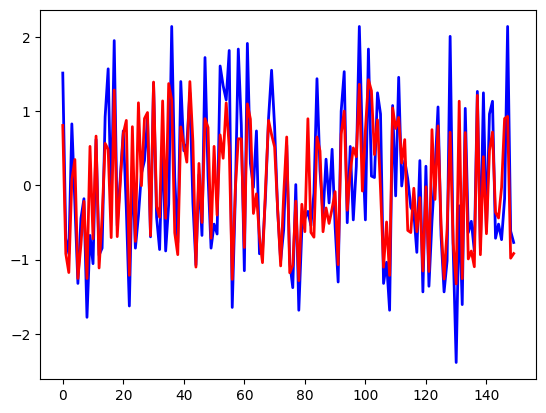

In [30]:
c = [i for i in range(0,150,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_train, color="blue", linewidth=2, linestyle="-")
plt.plot(c,predictions, color="red",  linewidth=2, linestyle="-")
plt.show()

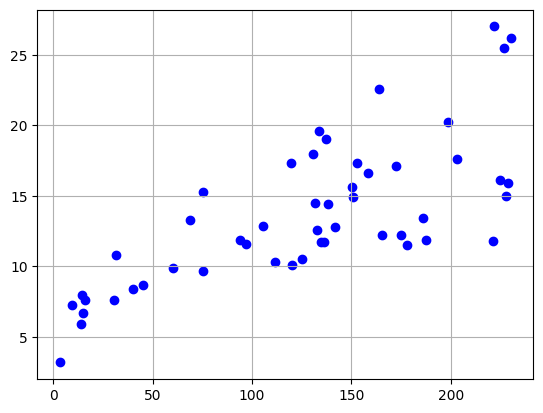

In [21]:
y_pred = np.zeros(x_test.shape[0])

for i in range(x_test.shape[0]):
    y_pred[i] = f(w,x_test[150 + i],b)

reversen = lambda y: y + 
 
fig = plt.figure()
plt.scatter(y_pred,y_test, color="blue", marker='o')

plt.grid()